*Author: Miguel Alvarez Garcia*

*Universidad de Oviedo*

*mglalvarezg@gmail.com | uo291291@uniovi.es*

# `ldbx` - Module 1: Data Preprocessing

Data preprocessing is essential to obtain robust and reliable results. This guide shows you how to use the `data_preprocessing` module of the `ldbx` package to perform missing data assessment and imputation, and outlier detection.

## 0. Setup

In [1]:
import pandas as pd

from data_processing import compute_missing, impute_missing_values, remove_outliers
from viz_utils import missing_values_heatmap, plot_imputation_distribution_assessment

pd.set_option('display.max_columns', None)

C:\Users\Miguel\anaconda3\lib\site-packages\outdated\utils.py:14: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  return warn(


## 1. Data loading

In [2]:
df = pd.read_csv('../../data/pisa_spain_sample_v2.csv')
df.head()

,stu_original_order,ST004D01T,IMMIG,REPEAT,AGE,PAREDINT,BMMJ1,BFMJ2,HISEI,DURECEC,BSMJ,MMINS,LMINS,SMINS,TMINS,FCFMLRTY,SCCHANGE,CHANGE,STUBMI,ESCS,UNDREM,METASUM,METASPAM,ICTHOME,ICTSCH,HOMEPOS,CULTPOSS,HEDRES,WEALTH,ICTRES,DISCLIMA,TEACHSUP,DIRINS,PERFEED,EMOSUPS,STIMREAD,ADAPTIVITY,TEACHINT,JOYREAD,SCREADCOMP,SCREADDIFF,PERCOMP,PERCOOP,ATTLNACT,COMPETE,WORKMAST,GFOFAIL,EUDMO,SWBP,RESILIENCE,MASTGOAL,GCSELFEFF,GCAWARE,ATTIMM,INTCULT,PERSPECT,COGFLEX,RESPECT,AWACOM,GLOBMIND,DISCRIM,BELONG,BEINGBULLIED,ENTUSE,HOMESCH,USESCH,INTICT,COMPICT,AUTICT,SOIAICT,ICTCLASS,ICTOUTSIDE,INFOCAR,INFOJOB1,INFOJOB2,FLCONFIN,FLCONICT,FLSCHOOL,FLFAMILY,BODYIMA,SOCONPA,W_FSTUWT
0,8270,2.0,1.0,0.0,15.75,12.0,54.55,29.18,54.55,2.0,51.50,220.0,220.0,0.0,1650.0,5.0,NaN,NaN,NaN,-0.8158,0.45,0.59,-1.41,NaN,NaN,-1.3356,-0.7075,-1.0118,-0.8567,-1.5445,-1.0826,-1.1481,-0.7139,-1.6391,-0.6576,-1.3412,-0.2644,-1.0346,-0.4389,-0.5485,0.4090,-1.5580,-0.9391,1.0844,0.1956,0.2119,-0.9823,-0.6723,0.6502,-0.0614,-0.8444,-0.2721,-0.5368,-0.2312,-0.5669,-1.2740,-0.2417,-0.0540,-0.6937,-0.1115,-0.5252,0.3241,-0.7823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.5238,NaN,1.0775,-0.3855,NaN,NaN,9.12959
1,18270,1.0,3.0,1.0,15.75,3.0,NaN,NaN,NaN,3.0,75.13,220.0,220.0,110.0,1650.0,NaN,NaN,NaN,NaN,-2.7449,-0.94,-1.34,1.33,NaN,NaN,-0.4448,-0.5491,-0.6853,0.1307,-0.8794,0.2108,1.3140,0.7198,-0.3253,-0.6576,-0.1030,1.1853,-0.2934,-0.8176,-0.5485,0.4090,-0.6142,NaN,-0.6583,0.1956,-0.4540,0.4637,-0.1652,-0.5928,-0.0614,-1.3162,-0.2302,-0.6113,1.4992,-0.6110,-0.2045,-0.2417,0.9289,-0.4506,-0.9188,0.5881,-0.3184,-0.7823,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.26205
2,31863,2.0,1.0,1.0,16.08,14.5,46.76,17.56,46.76,NaN,NaN,220.0,165.0,110.0,1760.0,4.0,0.0,0.0,23.39,0.0050,1.15,0.59,1.33,9.0,5.0,0.0075,0.5143,-0.6853,-0.0741,-0.3490,0.2377,-0.6262,-0.1803,-0.6555,0.2127,-0.9225,-0.1716,0.1744,-0.9016,-0.9323,-0.0362,-0.9514,-0.3047,0.0083,1.1811,-0.3599,-1.0109,-0.2670,1.2386,0.0210,-1.2137,1.3434,-0.0549,-0.2014,-0.6544,-0.1160,1.4543,0.9289,-0.5340,0.1330,0.9385,0.4766,-0.7823,-0.0976,-0.4798,-0.7578,-0.0186,0.1782,0.0979,0.7595,0.5207,0.7709,-0.0393,-0.8851,-0.0474,-0.6826,-0.3051,-0.6368,0.3276,0.8357,0.0157,28.67168
3,31473,1.0,1.0,0.0,15.67,14.5,29.73,42.30,42.30,3.0,70.10,200.0,200.0,150.0,1500.0,3.0,0.0,0.0,19.68,-0.3694,1.15,0.21,0.87,9.0,8.0,-0.6764,-0.8404,-0.6853,-0.3370,-0.3490,0.5156,1.3140,0.4301,0.0728,0.3622,0.2464,0.5464,0.1744,2.6131,1.2374,-0.6311,-1.5580,0.6012,1.0844,-0.9792,1.7124,1.8905,1.3480,1.2386,2.3693,-0.2151,0.8550,-0.1355,1.4992,0.2865,0.8790,0.2165,0.9289,2.0513,2.0049,-1.1549,1.4326,-0.7823,-0.3210,-0.1448,0.7629,-0.7386,1.1228,0.8975,-0.8425,0.2861,-0.3140,0.2442,-0.8851,-0.0474,-1.4144,-1.2972,-0.9888,2.4020,-0.5858,0.9078,10.42103
4,19454,1.0,1.0,0.0,15.83,14.5,25.04,NaN,25.04,3.0,NaN,NaN,NaN,NaN,NaN,12.0,0.0,0.0,31.60,-0.4287,NaN,NaN,NaN,8.0,4.0,-0.0394,1.0094,-0.6853,-0.2160,-0.2116,-1.0963,1.3140,1.8202,2.0165,NaN,1.1506,2.0073,1.2403,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.9369,-0.2273,-0.0393,0.5109,0.2020,NaN,NaN,0.3016,-0.2188,-1.5386,-0.0974,3.22389


In [3]:
df.shape

(5000, 82)

We separate numerical and categorical variables.

In [5]:
num_vars = ['AGE', 'PAREDINT', 'BMMJ1',
       'BFMJ2', 'HISEI', 'DURECEC', 'BSMJ', 'MMINS',
       'LMINS', 'SMINS', 'TMINS', 'FCFMLRTY', 'SCCHANGE', 'CHANGE', 'STUBMI',
       'ESCS', 'UNDREM', 'METASUM', 'METASPAM', 'ICTHOME', 'ICTSCH', 'HOMEPOS',
       'CULTPOSS', 'HEDRES', 'WEALTH', 'ICTRES', 'DISCLIMA', 'TEACHSUP',
       'DIRINS', 'PERFEED', 'EMOSUPS', 'STIMREAD', 'ADAPTIVITY', 'TEACHINT',
       'JOYREAD', 'SCREADCOMP', 'SCREADDIFF', 'PERCOMP', 'PERCOOP', 'ATTLNACT',
       'COMPETE', 'WORKMAST', 'GFOFAIL', 'EUDMO', 'SWBP', 'RESILIENCE',
       'MASTGOAL', 'GCSELFEFF', 'GCAWARE', 'ATTIMM', 'INTCULT', 'PERSPECT',
       'COGFLEX', 'RESPECT', 'AWACOM', 'GLOBMIND', 'DISCRIM', 'BELONG',
       'BEINGBULLIED', 'ENTUSE', 'HOMESCH', 'USESCH', 'INTICT', 'COMPICT',
       'AUTICT', 'SOIAICT', 'ICTCLASS', 'ICTOUTSIDE', 'INFOCAR', 'INFOJOB1',
       'INFOJOB2', 'FLCONFIN', 'FLCONICT', 'FLSCHOOL', 'FLFAMILY', 'BODYIMA',
       'SOCONPA']
cat_vars = ['ST004D01T', 'IMMIG', 'REPEAT'] 

## 3. Data preprocessing

### 3.1. Missing values

#### 3.1.1. Missung value assessment

In [9]:
n_missing = df.isnull().sum().sum()
print('Missing values:', n_missing, f'({n_missing*100/df.size}%)')

Missing values: 49245 (12.010975609756098%)


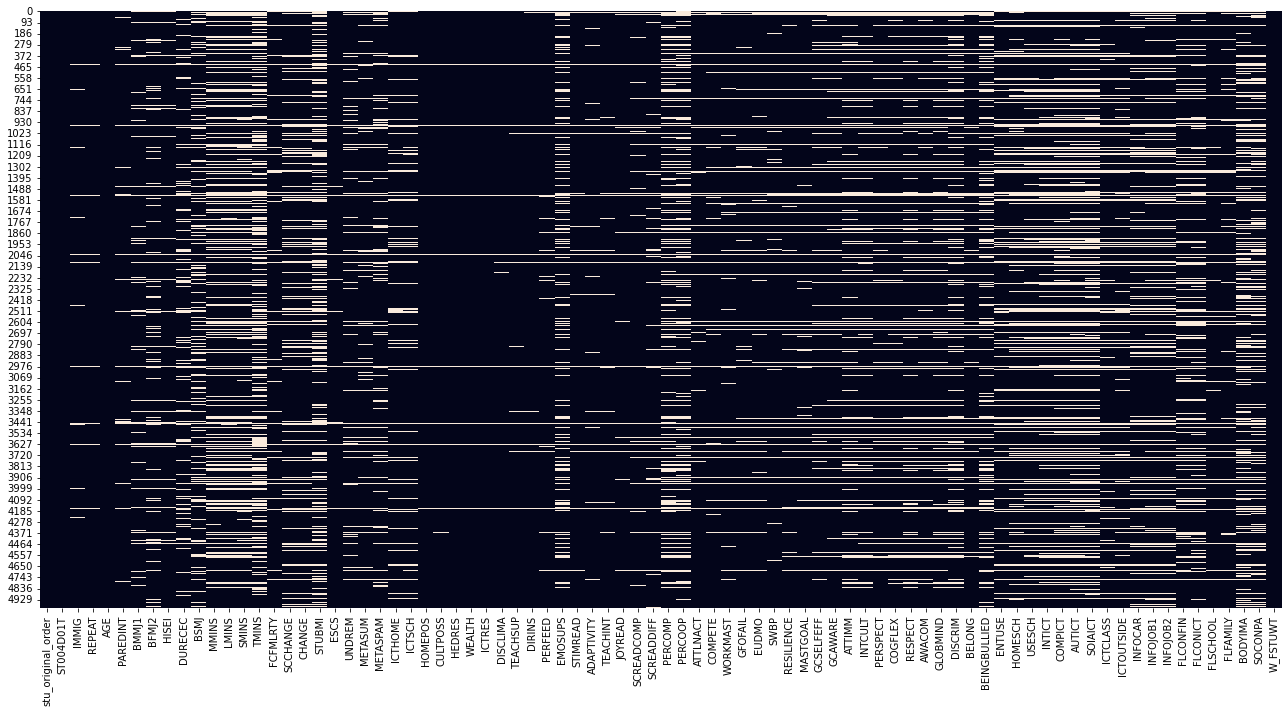

In [12]:
missing_values_heatmap(df) #, output_path='../../img/missing_values_heatmap_20220915_v2.jpg')

In [13]:
compute_missing(df).head(10)

,var_name,missing
14,TMINS,38.44
69,SOIAICT,29.96
18,STUBMI,28.94
68,AUTICT,28.12
67,COMPICT,27.42
79,BODYIMA,26.74
42,PERCOOP,26.48
80,SOCONPA,25.46
13,SMINS,25.26
62,BEINGBULLIED,24.76


In [6]:
compute_missing(df[num_vars+cat_vars]).describe()

,missing
count,80.000000
mean,12.311250
std,9.062944
min,0.000000
25%,4.900000
50%,10.700000
75%,18.925000
max,38.440000


In [7]:
print(compute_missing(df[num_vars+cat_vars]).describe())

         missing
count  80.000000
mean   12.311250
std     9.062944
min     0.000000
25%     4.900000
50%    10.700000
75%    18.925000
max    38.440000


#### 3.1.2. Data imputation. Easy approach

We use the function `impute_missing_values()` that implements all steps of the data imputation methodology in a single call.

In [6]:
# Note this is essential for reproducibility. Restart kernel every time you run the analysis for getting same results
np.random.seed(42)

In [7]:
df_imp = impute_missing_values(df, num_vars=num_vars, cat_vars=cat_vars)

--- One-to-one model based imputation for strongly related variables ---
Imputing with linear regression HOMEPOS -> WEALTH
Imputing with linear regression HOMEPOS -> ICTRES
Imputing with linear regression HOMEPOS -> ESCS
Imputing with linear regression ESCS -> PAREDINT
Imputing with linear regression ESCS -> HISEI
Imputing with linear regression ESCS -> BMMJ1
Imputing with linear regression HISEI -> BFMJ2
Imputing with linear regression SCCHANGE -> CHANGE
Imputing with linear regression FLCONFIN -> FLCONICT
Imputing with linear regression MMINS -> LMINS
--- Cluster based hot deck imputation ---
Partition: ['BFMJ2', 'BMMJ1', 'CULTPOSS', 'ESCS', 'HEDRES', 'HISEI', 'HOMEPOS', 'ICTHOME', 'ICTRES', 'PAREDINT', 'WEALTH']
Remaining missing values 47436
Partition: ['ADAPTIVITY', 'DIRINS', 'PERFEED', 'STIMREAD', 'TEACHINT', 'TEACHSUP']
Remaining missing values 47272
Partition: ['LMINS', 'MMINS', 'SMINS', 'TMINS']
Remaining missing values 46488
--- Removing records with more than 33.0 missing va

Let's now check that all values have been imputed and that the resulting variable distributions after imputation look similar to the original ones.

In [8]:
compute_missing(df_imp)

,var_name,missing
0,stu_original_order,0.0
61,BELONG,0.0
59,GLOBMIND,0.0
58,AWACOM,0.0
57,RESPECT,0.0
...,...,...
26,CULTPOSS,0.0
25,HOMEPOS,0.0
24,ICTSCH,0.0
23,ICTHOME,0.0


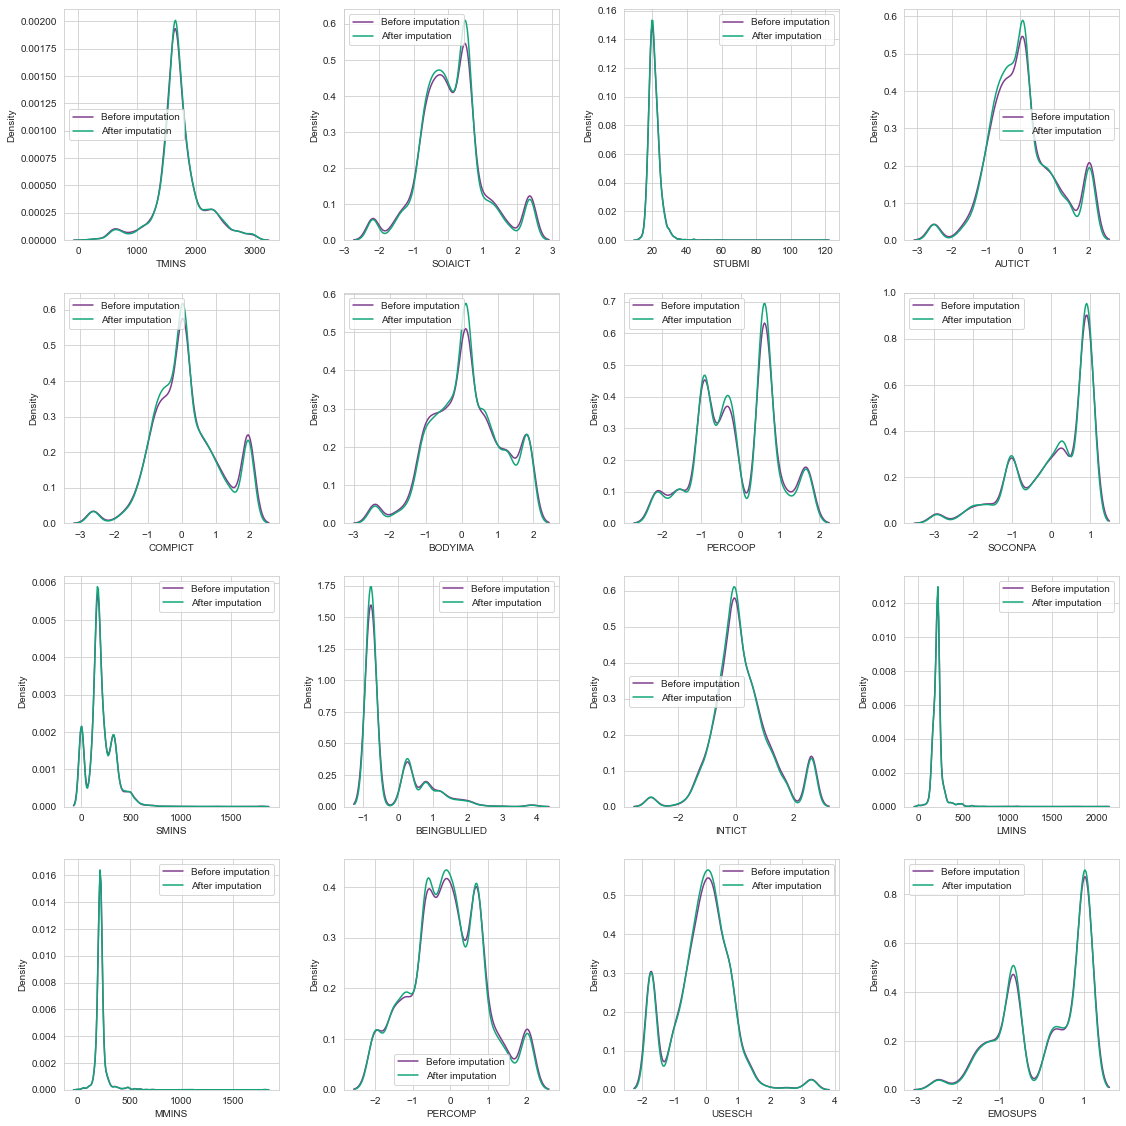

In [11]:
plot_imputation_distribution_assessment(df.loc[df_imp.index], df_imp, list(compute_missing(df).head(16)['var_name']),
                                        output_path='../../img/imputation_distribution_assessment_auto_20220922_v2.jpg')

Save the data frame with imputed values.

In [9]:
df_imp.to_csv('../../data/pisa_spain_sample_imputation_auto_20220922_v2_v1.csv', index=False)

### 3.2. Outlier detection

In [10]:
clean, outliers = remove_outliers(df_imp, num_vars+cat_vars)

In [11]:
clean.to_csv('../../data/pisa_spain_sample_processed_auto_20220922_v2_v1.csv', index=False)
outliers.to_csv('../../data/pisa_spain_sample_outliers_auto_20220922_v2_v1.csv', index=False)

In [12]:
print(df.shape, '>>', df.isnull().sum().sum())
print(df_imp.shape, '>>', df_imp.isnull().sum().sum())
print(clean.shape, '>>', clean.isnull().sum().sum())

(5000, 82) >> 49245
(4556, 82) >> 0
(4241, 82) >> 0
